In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.spatial import ConvexHull
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

**Implementation 1:** *Convex Hull*
1. Implement the following algorithms for finding a convex hull in the plane:


>>* Incremetal Algorithm


In [ ]:
def ccw(points):
  # Return True if the determinant is positive otherwise False
  return True if np.linalg.det(np.insert(np.array(points), 0, 1, axis=1)) > 0 else False

def incremental(P):
  # Sort the points
  P = sorted(P, key=lambda p: (p[0], p[1]))
  # Add the first and the second
  L_up = [P[0], P[1]]
  # For the 3rd element until the end
  for i in range(2, len(P)):
    # Add it in the list
    L_up.append(P[i])
    # Remove the element before last if the list has at least 3 points and their turn is counter clock wise
    while len(L_up) > 2 and ccw(L_up[-3:]):
      del L_up[-2]
  # Add the last and before last
  L_down = [P[-1], P[-2]]
  # From the 3rd from last element until the first
  for i in range(len(P) - 3, -1, -1):
    # add it in the list
    L_down.append(P[i])
    # Remove the element before last if the list has at least 3 points and their turn is counter clock wise
    while len(L_down) > 2 and ccw(L_down[-3:]):
      del L_down[-2]
  # We return an array of the appended L_down list in the L_up list after we remove the first and last item
  return np.array(L_up + L_down[1:-1])

>>* Gift Wrapping Algorithm

In [ ]:
def cw(points):
  # Return True if the determinant is negative otherwise False
  return True if np.linalg.det(np.insert(np.array(points), 0, 1, axis=1)) < 0 else False

def collinear(points):
  # Return True if the determinant is zero otherwise False
  return True if np.linalg.det(np.insert(np.array(points), 0, 1, axis=1)) == 0 else False

def interiorpoint(r, u, t):
    # Check if point u is between points r and t on the line segment rt
    return (r[0] <= u[0] <= t[0] or r[0] >= u[0] >= t[0]) and (r[1] <= u[1] <= t[1] or r[1] >= u[1] >= t[1])

def giftwrapping(S):
  # Initialize the list of peaks
  P = []
  # Initialize current peak with the r0 which is the peak with the smallest (x, y) coordinates
  r = r0 = min(S)
  while True:
    # Add the current peak into the list of peaks
    P.append(r)
    # Choose a point from S (the first one)
    u = S[0]
    # We iterate over every element from second to last
    for j in range(len(S)):
      # t is the current element of S
      t = S[j]
      # If the points are collinear the u is interior point of rt or the turn is clock wise then
      if (collinear([r, u, t]) and interiorpoint(r, u, t)) or cw([r, u, t]):
        # Update the value of u in that of t
        u = t
    # If the beginning is the same as the start then we are done
    if u == r0:
      return np.array(P)
    # Otherwise we are updating the current peak and do it all over again
    else:
      r = u

>>* Divides and Conquers Algorithm<br><br> Since the implementation with the bridges was a bit "heavy" in debugging and since you allowed us to use another algorithm, I join the two convex ones with the incremental algorithm.

In [ ]:
def dac(P):
  # Base case to construct a convex hull with 3 points
  if len(P) <= 3:
    return P

  # Split the points
  A = P[:len(P)//2]
  B = P[len(P)//2:]

  # Recurisve call of divide and conquer
  convex_A = dac(A)
  convex_B = dac(B)

  # Merge the two convexes and return the result
  return incremental(convex_A + convex_B).tolist()

>>* QuickHull Algorithm.<br><br>
For the QuickHull algorithm I chose to use the [spicy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html) python implementation.

2. How do the above algorithms behave in degenerate cases?<br><br>
<u> **Answer:**</u></br>
Incremental algorithm: In degenerate cases, where the points are in a straight line or form a regular pattern, the incremental algorithm can experience performance issues. The algorithm is based on adding points incrementally and maintaining the convex hull at each step. If the points are degenerate, the construction of the convex hull may become inefficient, leading to possible performance degradation. <br><br>
"Wrap" algorithm (Jarvis march): The algorithm is known to handle degenerate cases relatively well. However, if the points are collinear or nearly collinear, the algorithm may produce incorrect results or "fall" into an infinite loop. Correct handling of alignment points is essential to ensure correct behavior.<br><br>
Divide-and-Cover Algorithm: Can handle degenerate cases, but may experience performance issues. In cases where the points are degenerate, such as on a straight line, the division step of the algorithm can lead to unbalanced partitions, leading to inefficiency. Careful handling of degenerate cases is necessary to maintain good performance.<br><br>
Quickhull Algorithm: The quickhull algorithm generally performs well in degenerate cases such as collinear points or points lying in a plane. Effectively eliminates unnecessary points for the construction of the convex hull. However, the performance of the algorithm may degrade if the input has a large number of degenerate cases or if the point distribution poses challenges for the quickhull partitioning strategy. Correct handling and optimization techniques are often required for optimal performance.

3. Implement an algorithm of your choice for finding convex hull in 3 dimensions.<br><br>
As I mentioned before I chose to use the [spicy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html) implementation which also supports sets of points in space.

**Application 1.**
1. Consider 80 random points on the plane.

In [ ]:
# Generate 80 random points in the plane
np.random.seed(212)
P = [tuple(coordinate) for coordinate in np.random.random((80, 2))]

>>(aʹ) Find the convex hull of these points using the above algorithms. Present the results as lists of points and schematics.

For convenience, I implemented a function which, given the set of points `P`, the list of convex elements, the title, and whether the algorithm is `quickhull` (because it has a different display process) prints the points chosen by algorithm and then creates the corresponding graph.

In [ ]:
def plot_and_print(P, convex, title, quick):
  # If the convex is the quickhull it needs to be printed differently
  if quick:
    print(P[convex.vertices])
    for simplex in convex.simplices:
      plt.plot(P[simplex, 0], P[simplex, 1], 'b-')
  else:
    print(convex)
    plt.plot(convex[:,0],convex[:,1], 'b-')
    plt.plot([convex[-1,0],convex[0,0]],[convex[-1,1],convex[0,1]], 'b-')

  # # Print the points, turn off the axis and add a title is common procedures
  plt.plot(P[:,0], P[:,1], 'ro')
  plt.axis('off')
  plt.title(title)
  plt.show()

[[0.00176069 0.41240782]
 [0.03581502 0.8336479 ]
 [0.10737466 0.92437741]
 [0.24093926 0.97202878]
 [0.86868051 0.96056981]
 [0.9320879  0.94555096]
 [0.99223941 0.74931945]
 [0.97641833 0.36880445]
 [0.91802684 0.02231103]
 [0.56798499 0.00159756]
 [0.05103026 0.01000737]]


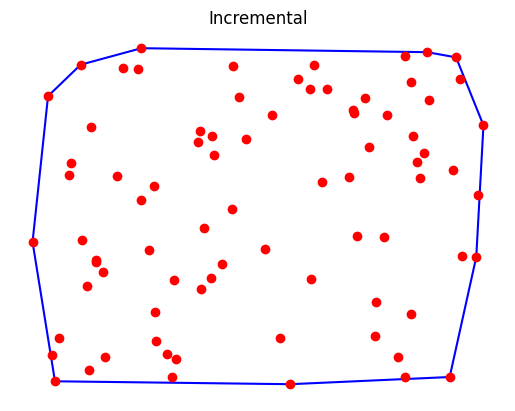

In [ ]:
# Incremental
inc = incremental(P)
plot_and_print(np.array(P), inc, 'Incremental', False)

[[0.00176069 0.41240782]
 [0.05103026 0.01000737]
 [0.56798499 0.00159756]
 [0.91802684 0.02231103]
 [0.97641833 0.36880445]
 [0.99223941 0.74931945]
 [0.9320879  0.94555096]
 [0.86868051 0.96056981]
 [0.24093926 0.97202878]
 [0.10737466 0.92437741]
 [0.03581502 0.8336479 ]]


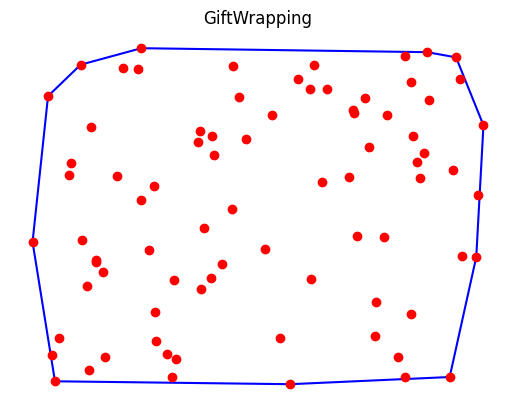

In [ ]:
# GiftWrapping
gift = giftwrapping(P)
plot_and_print(np.array(P), gift, 'GiftWrapping', False)

[[0.00176069 0.41240782]
 [0.03581502 0.8336479 ]
 [0.10737466 0.92437741]
 [0.24093926 0.97202878]
 [0.86868051 0.96056981]
 [0.9320879  0.94555096]
 [0.99223941 0.74931945]
 [0.97641833 0.36880445]
 [0.91802684 0.02231103]
 [0.56798499 0.00159756]
 [0.05103026 0.01000737]]


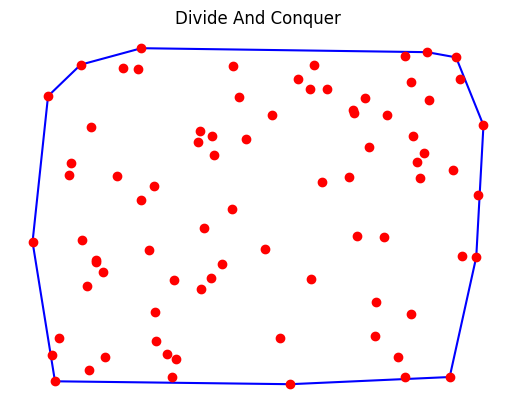

In [ ]:
# Divide And Conquer
points = P
points.sort()
diac = dac(points)
plot_and_print(np.array(points), np.array(diac), 'Divide And Conquer', False)

[[0.00176069 0.41240782]
 [0.05103026 0.01000737]
 [0.56798499 0.00159756]
 [0.91802684 0.02231103]
 [0.97641833 0.36880445]
 [0.99223941 0.74931945]
 [0.9320879  0.94555096]
 [0.86868051 0.96056981]
 [0.24093926 0.97202878]
 [0.10737466 0.92437741]
 [0.03581502 0.8336479 ]]


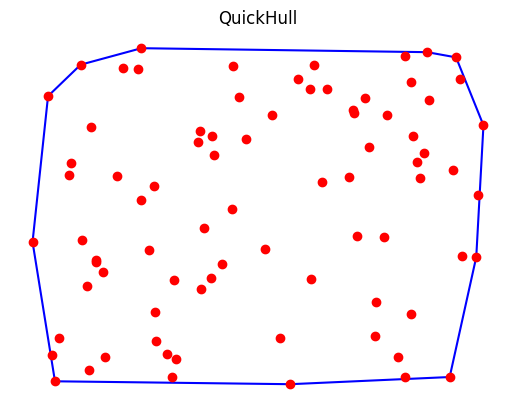

In [ ]:
# QuickHull
qhull = ConvexHull(P)
plot_and_print(np.array(P), qhull, 'QuickHull', True)

>> (bʹ) Visualize the steps of an algorithm from the above for the construction of the convex hull.

In [ ]:
def giftwrapping_show_steps(S):
  # Initialize the list of peaks
  P = []
  print(f"Initializing P: {P}\n")
  # Initialize current peak with the r0 which is the peak with the smallest (x, y) coordinates
  r = r0 = min(S)
  print(f"Initializing r with r0 which is {r0}\n")
  while True:
    # Add the current peak into the list of peaks
    P.append(r)
    print(f"Add current peak {r} to the list\n")
    print(f"\tNew list {P}\n")
    # Choose a point from S (the first one)
    u = S[0]
    print(f"Initialize u with a point of S which is {u}\n")
    # We iterate over every element from second to last
    print("Now we are going to test every element of S\n")
    for j in range(len(S)):
      # t is the current element of S
      t = S[j]
      print(f"Initialize t with S[j], j = {j} and S[j] = {S[j]}\n")
      # If the points are collinear the u is interior point of rt or the turn is clock wise then
      print
      if (collinear([r, u, t]) and interiorpoint(r, u, t)):
        print(f"The points r, u, t are collinear and u is interior point of rt\n")
        u = t
        print(f"\tUpdate value of u with t = {t}\n")
      elif cw([r, u, t]):
        print(f"The poinrs r, u, t has a clock wise turn\n")
        # Update the value of u in that of t
        u = t
        print(f"\tUpdate value of u with t = {t}\n")
      else:
        print("The points are neither collinear nor u is interior point of rt and they dont not have a clock wise turn\n")
        print("Increasing j and move to the next iteration\n")
    # If the beginning is the same as the start then we are done
    if u == r0:
      print(f"The end = {u} is the same as the start = {r0}, so we stop\n")
      return np.array(P)
    # Otherwise we are updating the current peak and do it all over again
    else:
      print(f"The end = {u} is not the same with the start = {r0}\n")
      print(f"\tUpdate r value with u = {u} and do it all over again\n")
      r = u

result = giftwrapping_show_steps(P)
print(result)

Streaming output truncated to the last 5000 lines.

Initialize t with S[j], j = 69 and S[j] = (0.861498650149463, 0.6700470025127401)

The points are neither collinear nor u is interior point of rt and they dont not have a clock wise turn

Increasing j and move to the next iteration

Initialize t with S[j], j = 70 and S[j] = (0.8686805101171966, 0.9605698101846996)

The points are neither collinear nor u is interior point of rt and they dont not have a clock wise turn

Increasing j and move to the next iteration

Initialize t with S[j], j = 71 and S[j] = (0.873094472557112, 0.8214460839524014)

The points are neither collinear nor u is interior point of rt and they dont not have a clock wise turn

Increasing j and move to the next iteration

Initialize t with S[j], j = 72 and S[j] = (0.9180268407392519, 0.022311032771276773)

The points are neither collinear nor u is interior point of rt and they dont not have a clock wise turn

Increasing j and move to the next iteration

Initialize t

2. Considering different sets of points on the plane, compare the above algorithms based on their execution time and the quality of the results extracted.

[[0.05618576 0.90317035]
 [0.63568226 0.89239499]
 [0.87718902 0.65826929]
 [0.84468407 0.19816368]
 [0.62645648 0.01349865]
 [0.16593222 0.46365768]]


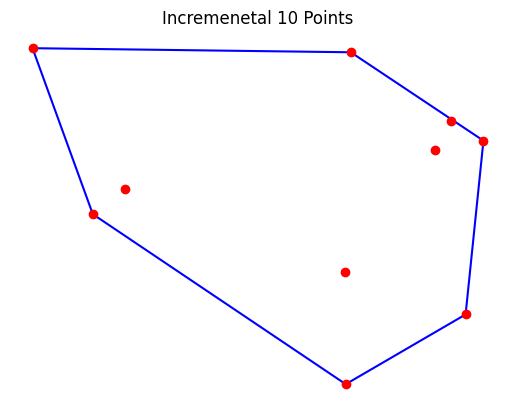


[[0.03426077 0.66192569]
 [0.03865624 0.90254665]
 [0.10695645 0.98250735]
 [0.46546903 0.99748321]
 [0.91981593 0.99674984]
 [0.96102375 0.9301472 ]
 [0.97073869 0.57509303]
 [0.90488523 0.14107327]
 [0.68640876 0.03586227]
 [0.04190579 0.0756315 ]]


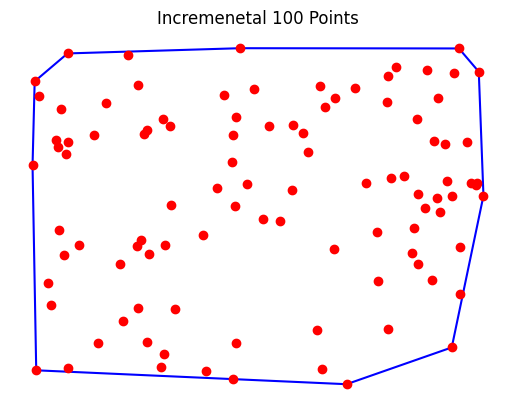


[[1.00158591e-04 7.40905785e-01]
 [1.64188748e-03 8.10552004e-01]
 [5.52232217e-03 9.85027127e-01]
 [6.15543662e-03 9.92640174e-01]
 [6.39657403e-02 9.97921688e-01]
 [2.10665031e-01 9.98746443e-01]
 [6.20464271e-01 9.99480250e-01]
 [9.94088160e-01 9.97597863e-01]
 [9.99932329e-01 9.96415380e-01]
 [9.99830938e-01 6.79154662e-01]
 [9.97547911e-01 1.58726525e-01]
 [9.84717466e-01 2.46117302e-02]
 [9.80345238e-01 1.52855539e-02]
 [6.15312257e-01 4.41013896e-03]
 [3.49909329e-01 1.03088995e-03]
 [2.83473993e-02 3.64773459e-04]
 [1.98335486e-03 3.57067516e-03]]


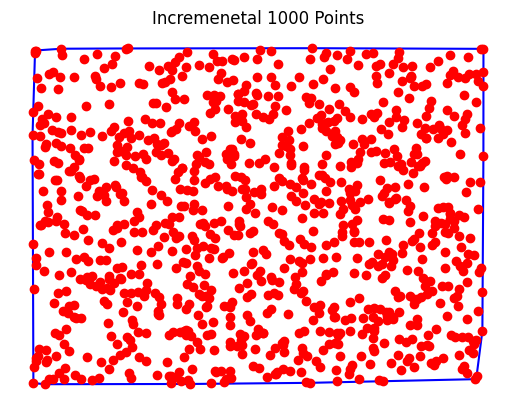


[[3.36185551e-05 8.08936798e-01]
 [2.95402131e-04 9.40261100e-01]
 [2.04972215e-03 9.69331930e-01]
 [4.84138998e-03 9.92716022e-01]
 [1.46345483e-02 9.96087555e-01]
 [1.28119713e-01 9.98565468e-01]
 [1.99286177e-01 9.99776425e-01]
 [4.09936245e-01 9.99912759e-01]
 [8.35981357e-01 9.99892633e-01]
 [9.48673847e-01 9.99884663e-01]
 [9.88860983e-01 9.94827160e-01]
 [9.96537117e-01 9.81342852e-01]
 [9.99047371e-01 8.82516596e-01]
 [9.99463231e-01 7.13472626e-01]
 [9.99743884e-01 3.36180610e-01]
 [9.98838283e-01 7.99184399e-02]
 [9.97575476e-01 2.77680258e-02]
 [9.92374988e-01 5.13945128e-03]
 [9.51029725e-01 7.25745638e-04]
 [3.43569250e-01 1.87769501e-05]
 [1.20059813e-01 3.71647650e-04]
 [1.20928520e-03 2.47679822e-03]
 [3.39248057e-04 1.04198960e-01]
 [4.47400436e-05 7.39368672e-01]]


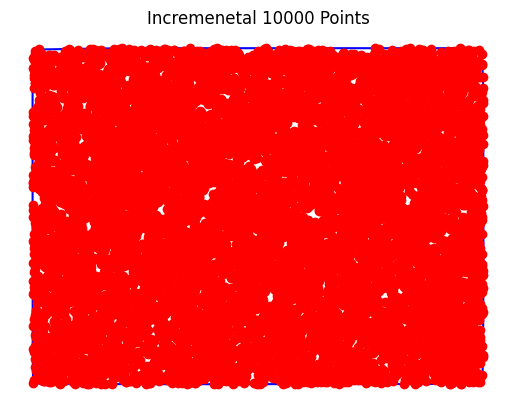


[[1.40107128e-05 2.19874691e-01]
 [1.49502332e-05 6.03564207e-01]
 [7.09974086e-05 8.26045574e-01]
 [1.62242143e-04 9.30883451e-01]
 [2.88314146e-04 9.54718575e-01]
 [5.02446962e-04 9.83545866e-01]
 [1.28665339e-03 9.92812788e-01]
 [1.88230802e-03 9.99631445e-01]
 [3.49280895e-03 9.99653898e-01]
 [3.74934921e-02 9.99878532e-01]
 [9.02295413e-02 9.99921156e-01]
 [6.50541546e-01 9.99997308e-01]
 [9.98751417e-01 9.99951783e-01]
 [9.99506275e-01 9.87000739e-01]
 [9.99869500e-01 9.65451621e-01]
 [9.99991429e-01 8.73530659e-01]
 [9.99996162e-01 4.93573591e-02]
 [9.99975932e-01 3.69860843e-02]
 [9.99224386e-01 3.87167370e-03]
 [9.96151768e-01 1.07775673e-03]
 [9.94449685e-01 1.19450706e-04]
 [9.51139806e-01 9.86473728e-05]
 [7.52752869e-01 5.74055298e-05]
 [5.19768477e-01 1.92723980e-05]
 [2.47362937e-01 9.56414895e-07]
 [1.41200082e-02 5.06950496e-05]
 [3.21371269e-03 1.63536091e-03]
 [8.14308296e-05 1.05838919e-02]
 [1.64689941e-05 1.21438964e-02]]


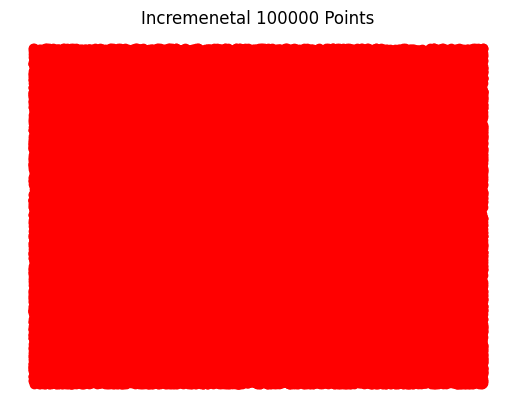


[[0.05618576 0.90317035]
 [0.16593222 0.46365768]
 [0.62645648 0.01349865]
 [0.84468407 0.19816368]
 [0.87718902 0.65826929]
 [0.63568226 0.89239499]]


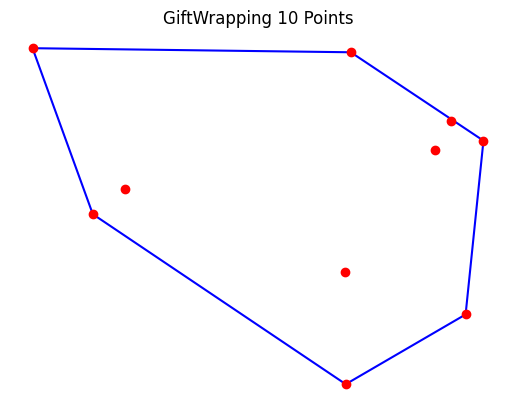


[[0.03426077 0.66192569]
 [0.04190579 0.0756315 ]
 [0.68640876 0.03586227]
 [0.90488523 0.14107327]
 [0.97073869 0.57509303]
 [0.96102375 0.9301472 ]
 [0.91981593 0.99674984]
 [0.46546903 0.99748321]
 [0.10695645 0.98250735]
 [0.03865624 0.90254665]]


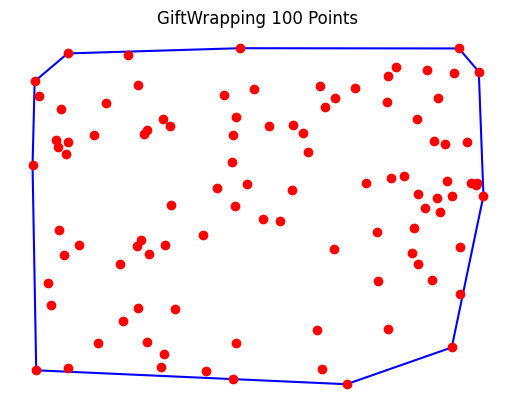


[[1.00158591e-04 7.40905785e-01]
 [1.98335486e-03 3.57067516e-03]
 [2.83473993e-02 3.64773459e-04]
 [3.49909329e-01 1.03088995e-03]
 [6.15312257e-01 4.41013896e-03]
 [9.80345238e-01 1.52855539e-02]
 [9.84717466e-01 2.46117302e-02]
 [9.97547911e-01 1.58726525e-01]
 [9.99830938e-01 6.79154662e-01]
 [9.99932329e-01 9.96415380e-01]
 [9.94088160e-01 9.97597863e-01]
 [6.20464271e-01 9.99480250e-01]
 [2.10665031e-01 9.98746443e-01]
 [6.39657403e-02 9.97921688e-01]
 [6.15543662e-03 9.92640174e-01]
 [5.52232217e-03 9.85027127e-01]
 [1.64188748e-03 8.10552004e-01]]


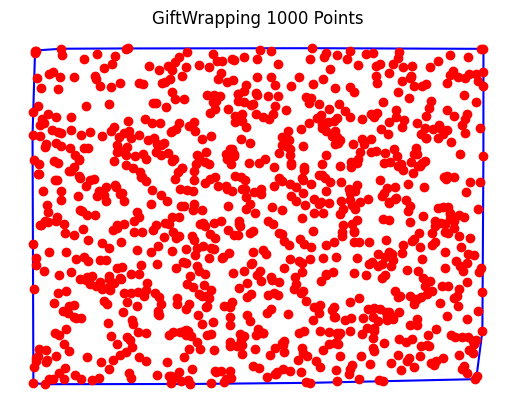


[[3.36185551e-05 8.08936798e-01]
 [4.47400436e-05 7.39368672e-01]
 [3.39248057e-04 1.04198960e-01]
 [1.20928520e-03 2.47679822e-03]
 [1.20059813e-01 3.71647650e-04]
 [3.43569250e-01 1.87769501e-05]
 [9.51029725e-01 7.25745638e-04]
 [9.92374988e-01 5.13945128e-03]
 [9.97575476e-01 2.77680258e-02]
 [9.98838283e-01 7.99184399e-02]
 [9.99743884e-01 3.36180610e-01]
 [9.99463231e-01 7.13472626e-01]
 [9.99047371e-01 8.82516596e-01]
 [9.96537117e-01 9.81342852e-01]
 [9.88860983e-01 9.94827160e-01]
 [9.48673847e-01 9.99884663e-01]
 [8.35981357e-01 9.99892633e-01]
 [4.09936245e-01 9.99912759e-01]
 [1.99286177e-01 9.99776425e-01]
 [1.28119713e-01 9.98565468e-01]
 [1.46345483e-02 9.96087555e-01]
 [4.84138998e-03 9.92716022e-01]
 [2.04972215e-03 9.69331930e-01]
 [2.95402131e-04 9.40261100e-01]]


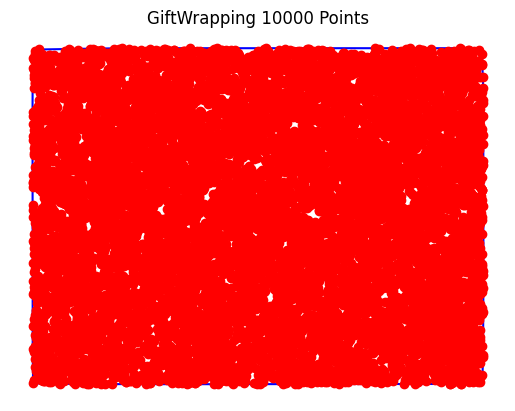


[[1.40107128e-05 2.19874691e-01]
 [1.64689941e-05 1.21438964e-02]
 [8.14308296e-05 1.05838919e-02]
 [3.21371269e-03 1.63536091e-03]
 [1.41200082e-02 5.06950496e-05]
 [2.47362937e-01 9.56414895e-07]
 [5.19768477e-01 1.92723980e-05]
 [7.52752869e-01 5.74055298e-05]
 [9.51139806e-01 9.86473728e-05]
 [9.94449685e-01 1.19450706e-04]
 [9.96151768e-01 1.07775673e-03]
 [9.99224386e-01 3.87167370e-03]
 [9.99975932e-01 3.69860843e-02]
 [9.99996162e-01 4.93573591e-02]
 [9.99991429e-01 8.73530659e-01]
 [9.99869500e-01 9.65451621e-01]
 [9.99506275e-01 9.87000739e-01]
 [9.98751417e-01 9.99951783e-01]
 [6.50541546e-01 9.99997308e-01]
 [9.02295413e-02 9.99921156e-01]
 [3.74934921e-02 9.99878532e-01]
 [3.49280895e-03 9.99653898e-01]
 [1.88230802e-03 9.99631445e-01]
 [1.28665339e-03 9.92812788e-01]
 [5.02446962e-04 9.83545866e-01]
 [2.88314146e-04 9.54718575e-01]
 [1.62242143e-04 9.30883451e-01]
 [7.09974086e-05 8.26045574e-01]
 [1.49502332e-05 6.03564207e-01]]


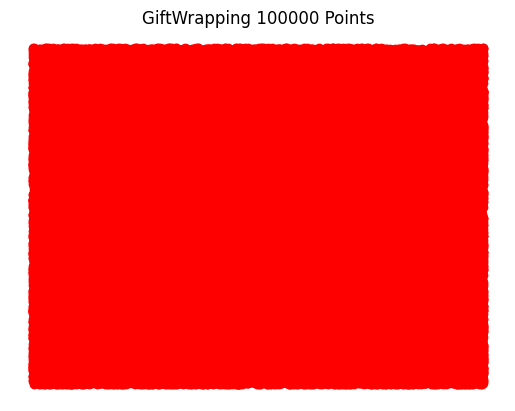


[[0.05618576 0.90317035]
 [0.63568226 0.89239499]
 [0.87718902 0.65826929]
 [0.84468407 0.19816368]
 [0.62645648 0.01349865]
 [0.16593222 0.46365768]]


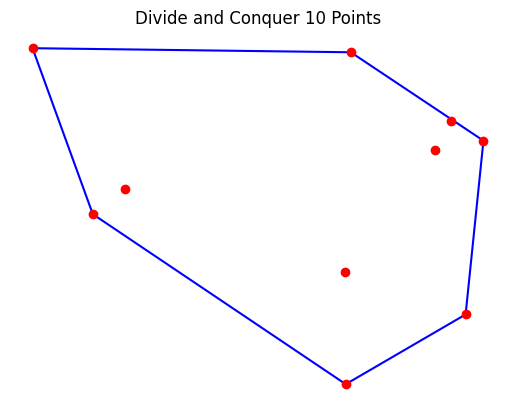


[[0.03426077 0.66192569]
 [0.03865624 0.90254665]
 [0.10695645 0.98250735]
 [0.46546903 0.99748321]
 [0.91981593 0.99674984]
 [0.96102375 0.9301472 ]
 [0.97073869 0.57509303]
 [0.90488523 0.14107327]
 [0.68640876 0.03586227]
 [0.04190579 0.0756315 ]]


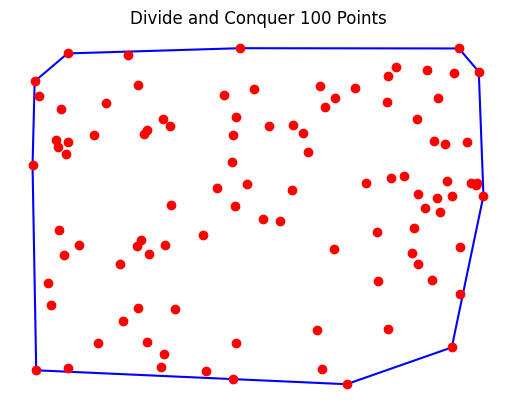


[[1.00158591e-04 7.40905785e-01]
 [1.64188748e-03 8.10552004e-01]
 [5.52232217e-03 9.85027127e-01]
 [6.15543662e-03 9.92640174e-01]
 [6.39657403e-02 9.97921688e-01]
 [2.10665031e-01 9.98746443e-01]
 [6.20464271e-01 9.99480250e-01]
 [9.94088160e-01 9.97597863e-01]
 [9.99932329e-01 9.96415380e-01]
 [9.99830938e-01 6.79154662e-01]
 [9.97547911e-01 1.58726525e-01]
 [9.84717466e-01 2.46117302e-02]
 [9.80345238e-01 1.52855539e-02]
 [6.15312257e-01 4.41013896e-03]
 [3.49909329e-01 1.03088995e-03]
 [2.83473993e-02 3.64773459e-04]
 [1.98335486e-03 3.57067516e-03]]


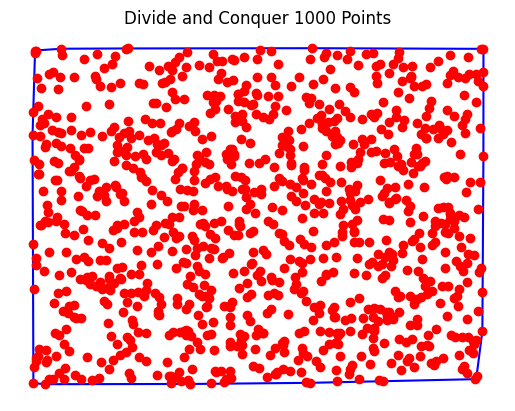


[[3.36185551e-05 8.08936798e-01]
 [2.95402131e-04 9.40261100e-01]
 [2.04972215e-03 9.69331930e-01]
 [4.84138998e-03 9.92716022e-01]
 [1.46345483e-02 9.96087555e-01]
 [1.28119713e-01 9.98565468e-01]
 [1.99286177e-01 9.99776425e-01]
 [4.09936245e-01 9.99912759e-01]
 [8.35981357e-01 9.99892633e-01]
 [9.48673847e-01 9.99884663e-01]
 [9.88860983e-01 9.94827160e-01]
 [9.96537117e-01 9.81342852e-01]
 [9.99047371e-01 8.82516596e-01]
 [9.99463231e-01 7.13472626e-01]
 [9.99743884e-01 3.36180610e-01]
 [9.98838283e-01 7.99184399e-02]
 [9.97575476e-01 2.77680258e-02]
 [9.92374988e-01 5.13945128e-03]
 [9.51029725e-01 7.25745638e-04]
 [3.43569250e-01 1.87769501e-05]
 [1.20059813e-01 3.71647650e-04]
 [1.20928520e-03 2.47679822e-03]
 [3.39248057e-04 1.04198960e-01]
 [4.47400436e-05 7.39368672e-01]]


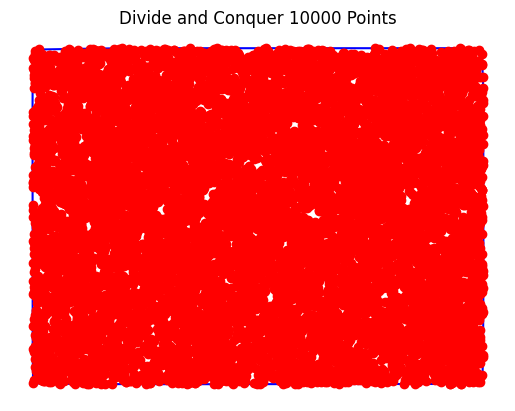


[[1.40107128e-05 2.19874691e-01]
 [1.49502332e-05 6.03564207e-01]
 [7.09974086e-05 8.26045574e-01]
 [1.62242143e-04 9.30883451e-01]
 [2.88314146e-04 9.54718575e-01]
 [5.02446962e-04 9.83545866e-01]
 [1.28665339e-03 9.92812788e-01]
 [1.88230802e-03 9.99631445e-01]
 [3.49280895e-03 9.99653898e-01]
 [3.74934921e-02 9.99878532e-01]
 [9.02295413e-02 9.99921156e-01]
 [6.50541546e-01 9.99997308e-01]
 [9.98751417e-01 9.99951783e-01]
 [9.99506275e-01 9.87000739e-01]
 [9.99869500e-01 9.65451621e-01]
 [9.99991429e-01 8.73530659e-01]
 [9.99996162e-01 4.93573591e-02]
 [9.99975932e-01 3.69860843e-02]
 [9.99224386e-01 3.87167370e-03]
 [9.96151768e-01 1.07775673e-03]
 [9.94449685e-01 1.19450706e-04]
 [9.51139806e-01 9.86473728e-05]
 [7.52752869e-01 5.74055298e-05]
 [5.19768477e-01 1.92723980e-05]
 [2.47362937e-01 9.56414895e-07]
 [1.41200082e-02 5.06950496e-05]
 [3.21371269e-03 1.63536091e-03]
 [8.14308296e-05 1.05838919e-02]
 [1.64689941e-05 1.21438964e-02]]


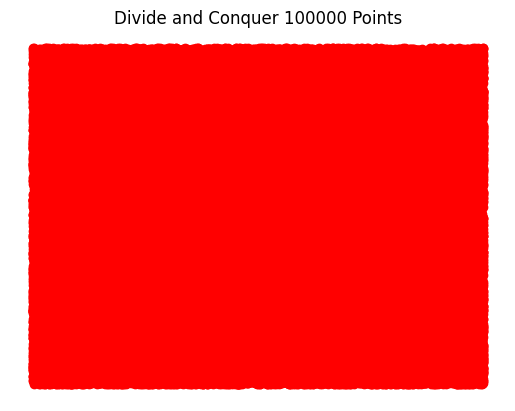


[[0.63568226 0.89239499]
 [0.05618576 0.90317035]
 [0.16593222 0.46365768]
 [0.62645648 0.01349865]
 [0.84468407 0.19816368]
 [0.87718902 0.65826929]]


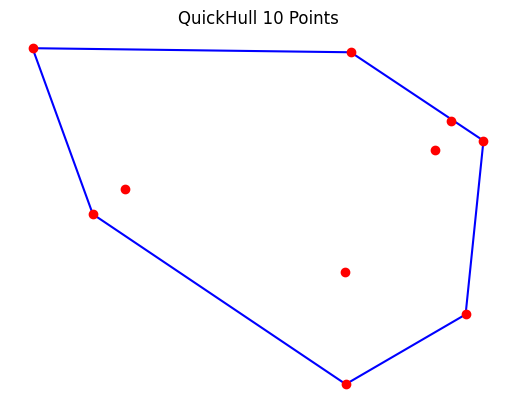


[[0.03426077 0.66192569]
 [0.04190579 0.0756315 ]
 [0.68640876 0.03586227]
 [0.90488523 0.14107327]
 [0.97073869 0.57509303]
 [0.96102375 0.9301472 ]
 [0.91981593 0.99674984]
 [0.46546903 0.99748321]
 [0.10695645 0.98250735]
 [0.03865624 0.90254665]]


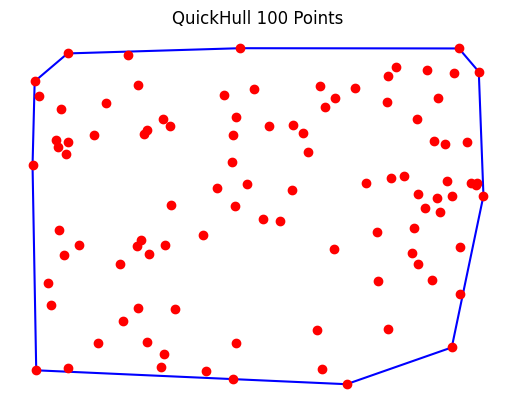


[[1.00158591e-04 7.40905785e-01]
 [1.98335486e-03 3.57067516e-03]
 [2.83473993e-02 3.64773459e-04]
 [3.49909329e-01 1.03088995e-03]
 [6.15312257e-01 4.41013896e-03]
 [9.80345238e-01 1.52855539e-02]
 [9.84717466e-01 2.46117302e-02]
 [9.97547911e-01 1.58726525e-01]
 [9.99830938e-01 6.79154662e-01]
 [9.99932329e-01 9.96415380e-01]
 [9.94088160e-01 9.97597863e-01]
 [6.20464271e-01 9.99480250e-01]
 [2.10665031e-01 9.98746443e-01]
 [6.39657403e-02 9.97921688e-01]
 [6.15543662e-03 9.92640174e-01]
 [5.52232217e-03 9.85027127e-01]
 [1.64188748e-03 8.10552004e-01]]


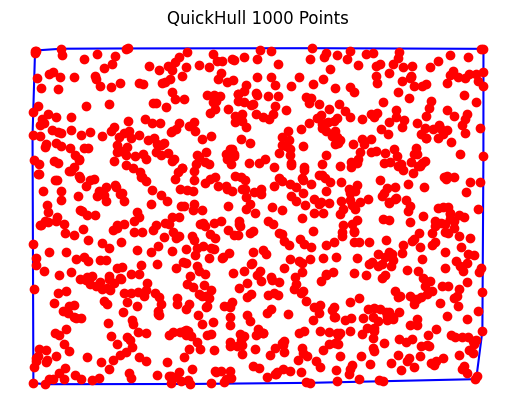


[[3.39248057e-04 1.04198960e-01]
 [1.20928520e-03 2.47679822e-03]
 [1.20059813e-01 3.71647650e-04]
 [3.43569250e-01 1.87769501e-05]
 [9.51029725e-01 7.25745638e-04]
 [9.92374988e-01 5.13945128e-03]
 [9.97575476e-01 2.77680258e-02]
 [9.98838283e-01 7.99184399e-02]
 [9.99743884e-01 3.36180610e-01]
 [9.99463231e-01 7.13472626e-01]
 [9.99047371e-01 8.82516596e-01]
 [9.96537117e-01 9.81342852e-01]
 [9.88860983e-01 9.94827160e-01]
 [9.48673847e-01 9.99884663e-01]
 [8.35981357e-01 9.99892633e-01]
 [4.09936245e-01 9.99912759e-01]
 [1.99286177e-01 9.99776425e-01]
 [1.28119713e-01 9.98565468e-01]
 [1.46345483e-02 9.96087555e-01]
 [4.84138998e-03 9.92716022e-01]
 [2.04972215e-03 9.69331930e-01]
 [2.95402131e-04 9.40261100e-01]
 [3.36185551e-05 8.08936798e-01]
 [4.47400436e-05 7.39368672e-01]]


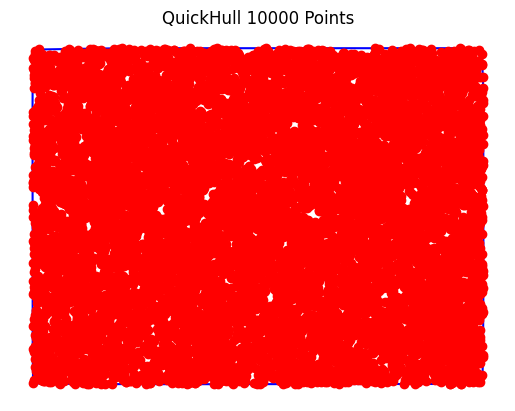


[[9.98751417e-01 9.99951783e-01]
 [6.50541546e-01 9.99997308e-01]
 [9.02295413e-02 9.99921156e-01]
 [3.74934921e-02 9.99878532e-01]
 [3.49280895e-03 9.99653898e-01]
 [1.88230802e-03 9.99631445e-01]
 [1.28665339e-03 9.92812788e-01]
 [5.02446962e-04 9.83545866e-01]
 [2.88314146e-04 9.54718575e-01]
 [1.62242143e-04 9.30883451e-01]
 [7.09974086e-05 8.26045574e-01]
 [1.49502332e-05 6.03564207e-01]
 [1.40107128e-05 2.19874691e-01]
 [1.64689941e-05 1.21438964e-02]
 [8.14308296e-05 1.05838919e-02]
 [3.21371269e-03 1.63536091e-03]
 [1.41200082e-02 5.06950496e-05]
 [2.47362937e-01 9.56414895e-07]
 [5.19768477e-01 1.92723980e-05]
 [7.52752869e-01 5.74055298e-05]
 [9.51139806e-01 9.86473728e-05]
 [9.94449685e-01 1.19450706e-04]
 [9.96151768e-01 1.07775673e-03]
 [9.99224386e-01 3.87167370e-03]
 [9.99975932e-01 3.69860843e-02]
 [9.99996162e-01 4.93573591e-02]
 [9.99991429e-01 8.73530659e-01]
 [9.99869500e-01 9.65451621e-01]
 [9.99506275e-01 9.87000739e-01]]


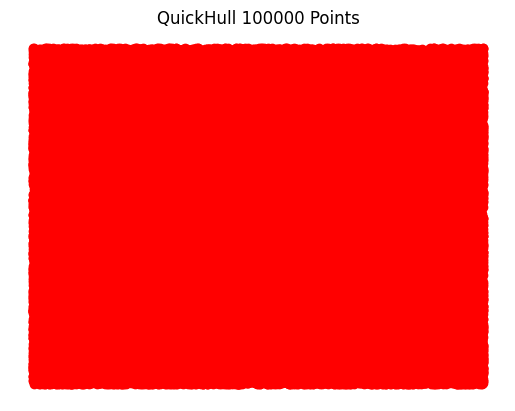

In [ ]:
# Initialize four lists in where I will store the data to print them
incremental_stats = []
giftwrapping_stats = []
divide_and_conquer_stats = []
quickhull_stats = []

# Add column labels
headers = ["Algorithms - Points"]

# A list with different set of points to test
test_set = []
for i in range(5):
  number = 10**(i+1)
  headers.append(str(number))
  test_set += [[tuple(coordinate) for coordinate in np.random.random((number, 2))]]

# Make a list with all lists that has stats
stats = [incremental_stats, giftwrapping_stats, divide_and_conquer_stats, quickhull_stats]

# Make a list with all algorithms
algorithms = [incremental, giftwrapping, dac, ConvexHull]

# Iterate over every set of points for every algorithm
# We will measure its time to find the result
# We will also print the list of points and make the plot
for stats, algorithm, title in zip(stats, algorithms, [
    "Incremenetal ",
    "GiftWrapping ",
    "Divide and Conquer ",
    "QuickHull "
    ]):
  is_quick = True if algorithm == ConvexHull else False
  for point_set in test_set:
    startTime = time.time()
    if algorithm is dac:
      temp_points = sorted(point_set, key=lambda p: (p[0], p[1]))
      convex = algorithm(temp_points)
    else:
      convex = algorithm(point_set)
    endTime = time.time()
    stats += [f"{endTime-startTime}"]
    if algorithm == dac:
      plot_and_print(np.array(temp_points), np.array(convex), title + str(len(temp_points)) + ' Points', is_quick)
    else:
      plot_and_print(np.array(point_set), convex, title + str(len(point_set)) + ' Points', is_quick)
    print()

In [ ]:
# Add row labels
incremental_stats = ['Incremental'] + incremental_stats
giftwrapping_stats = ['GiftWrapping'] + giftwrapping_stats
divide_and_conquer_stats = ['Divide And Conquer'] + divide_and_conquer_stats
quickhull_stats = ['QuickHull'] + quickhull_stats

# Print the table
print(tabulate([incremental_stats, giftwrapping_stats, divide_and_conquer_stats, quickhull_stats], headers, tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════╤════════════╤════════════╤═══════════╤═════════════╕
│ Algorithms - Points   │          10 │        100 │       1000 │     10000 │      100000 │
╞═══════════════════════╪═════════════╪════════════╪════════════╪═══════════╪═════════════╡
│ Incremental           │ 0.000711203 │ 0.0160453  │ 0.0937715  │ 0.852719  │   8.22214   │
├───────────────────────┼─────────────┼────────────┼────────────┼───────────┼─────────────┤
│ GiftWrapping          │ 0.00470567  │ 0.0571258  │ 0.619114   │ 9.02548   │ 119.243     │
├───────────────────────┼─────────────┼────────────┼────────────┼───────────┼─────────────┤
│ Divide And Conquer    │ 0.00184488  │ 0.0307875  │ 0.364719   │ 2.35113   │  19.3939    │
├───────────────────────┼─────────────┼────────────┼────────────┼───────────┼─────────────┤
│ QuickHull             │ 0.00108504  │ 0.00449872 │ 0.00239277 │ 0.0211492 │   0.0586457 │
╘═══════════════════════╧═════════════╧════════════╧════════════╧═══════════╧═══

<u> **Answer:**</u></br>
The ranking order of the algorithms is as follows:<br><br>
$$QuickHull < Incremental < Divide\ And\ Conquer < GiftWrapping$$

1. Incremental:<br>
    * The time taken by the incremental algorithm increases almost linearly as the number of points increases. This aligns with the expected time complexity of $O(n log n)$, where n is the number of points. Therefore, the observed data confirm the expected time complexity.
2. GiftWrapping:<br>
    * The time taken by the GiftWrapping algorithm increases significantly faster than linearly as the number of points increases. This implies a time complexity greater than O(n) and closer to O(n^2). The observed data confirms the expected time complexity of O(n^2).
3. Divide and Conquer:<br>
    * The time taken by the Divide and Conquer algorithm is almost twice as long as that taken by the incremental algorithm and this is because in this particular implementation the Divide and Conquer algorithm uses the incremental algorithm to construct the convex hull. Therefore, the complexity is about $O(2nlogn)$
4. QuickHull:<br>
    * The QuickHull algorithm shows consistently low processing times regardless of the number of points. This indicates a time complexity that is significantly better than linear or quadratic. The data supports the expected time complexity of $O(n log n)$ or $O(nh)$ , confirming the expected complexity.

3. Consider 50 points in the space $\mathbb{R}^3$ and apply the algorithm that
you have implemented for the construction of their convex hull.

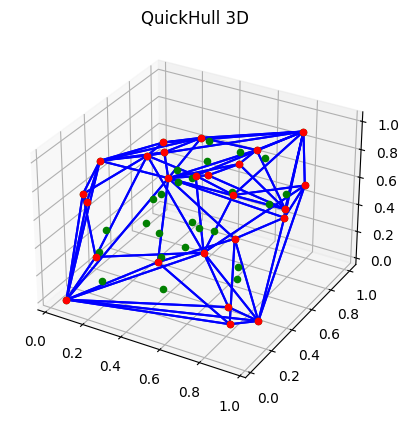

In [ ]:
# Generate 50 random 3D points
P = [tuple(coordinate) for coordinate in np.random.random((50, 3))]

# Compute the convex hull
hull = ConvexHull(P)

# Convert P set into numpy array
points = np.array(P)

# Access the vertices of the convex hull
vertices = points[hull.vertices]

# Plot the convex hull
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='g', marker='o', depthshade=False)

# Plot the convex hull vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='r', marker='o', depthshade=False)

# Plot the convex hull edges
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # Close the loop
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'b-')

plt.title('QuickHull 3D')
plt.show()

**Implementation 2:** *Geometric search.*

Let P be a set of n points in the plane.

1. Implement an orthogonal geometric search algorithm for the set of points P.

In [ ]:
class kd_node:
    def __init__(self, left, point, right):
        self.left = left
        self.point = point
        self.right = right

def kd_tree(P, depth = 0):
    # If the list of points has one point return that point
    if len(P) == 1:
      return kd_node(None, P[0], None)

    if len(P) > 1:
      # Sort the points based on the whether or not the depth is even or odd
      P.sort(key = lambda x: x[depth % 2])

      # Find the middle index and the middle point
      median_index = math.floor(len(P)/2)
      median = P[median_index]

      # If the depth is even the P1 has all the points from the left of the line L which
      # In this case is the middle point accordingly to our theory
      # if the depth is odd the P1 has all the points under the line L
      P_1 = P[:median_index]

      # If the depth is even the P2 has all the points fro the right of the line L
      # if the depth is odd the P2 has all the points above the line L
      P_2 = P[median_index+1:]

      # We make the two new kd_trees
      v_left = kd_tree(P_1, depth + 1)
      v_right = kd_tree(P_2, depth + 1)

      # Return the root of the tree and every subtree because of the fact that the function is recursive
      return kd_node(v_left, median, v_right)

def print_kd_tree(root, space=0, LEVEL_SPACE = 5):
    if root is None:
      return
    space += LEVEL_SPACE
    print_kd_tree(root.right, space)
    for i in range(LEVEL_SPACE, space): print(end = " ")
    print(str(root.point))
    print_kd_tree(root.left, space)

def points_inside(kd_tree, rectangle, depth=0):

    # If the node is a leaf then return "nothing"
    if kd_tree is None:
        return []

    # Breakdown the coordinates of the rectangle
    xmin, ymin, xmax, ymax = rectangle

    # Initialize the list which will have the points
    points = []

    # If the point is inside the parameters then add it to list
    if xmin <= kd_tree.point[0] <= xmax and ymin <= kd_tree.point[1] <= ymax:
        points.append(kd_tree.point)

    # According to the depth we either check the x or y coordinate
    # Which helps us to decide which side of the tree to explore next
    # Explore the left subtree
    if kd_tree.point[depth % 2] >= xmin:
        points += points_inside(kd_tree.left, rectangle, depth + 1)

    # Explore the right subtree
    if kd_tree.point[depth % 2] <= xmax:
        points += points_inside(kd_tree.right, rectangle, depth + 1)

    # Return the list with the points inside the rectangle
    return points

def plot_kd_tree_with_rectangle(P, kd_tree, points_within_area, rectangle):
  # # Plot all the points
  plt.plot(P[:, 0], P[:, 1], 'ro')

  # Breakdown the coordinates of the rectangle
  xmin, ymin, xmax, ymax = rectangle

  # Calculate the x and y values for plotting
  # Basically we compose the rectangle but we need to repeat the first point
  # In order for the line to be closed
  x_values = [xmin, xmax, xmax, xmin, xmin]
  y_values = [ymin, ymin, ymax, ymax, ymin]

  # Plot the rectangle
  plt.plot(x_values, y_values, 'b')

  # # Finally plot the ones inside with a different color
  if len(points_within_area) > 0:
    plt.plot(points_within_area[:, 0], points_within_area[:, 1], 'go')
  plt.title('KD-Tree Results')
  # plt.axis('off')
  plt.show()

2. Analyze the complexity of the above algorithm.<br><br>
<u> **Answer:**</u></br>
The complexity of a kd-tree geometric search algorithm depends on several factors:

   * Construction complexity: The first factor is the complexity of constructing the k-d tree. Building a balanced k-d tree from a set of n points has an average complexity of $O(n log n)$, assuming an optimal split is chosen at each level. However, the worst-case complexity can be $O(n^2)$ if splits constantly lead to unbalanced subtrees.

   * Search complexity: Once the k-d tree is constructed, the complexity of a range search algorithm depends on the number of points that lie within the given range. Suppose we want to find all points within a range defined by a minimum point (min) and a maximum point (max) in each dimension.

       * Best case: The best case scenario occurs when the range search region does not intersect any subtree of the k-d tree. In this case, the algorithm has O(log n) complexity since it only needs to traverse the tree along a single path to determine that no point falls within the region.

       * Worst case: The worst case scenario occurs when the range search region intersects all subtrees of the k-d tree. In this case, the algorithm has O(n) complexity, as it needs to traverse the entire tree and check each point to determine if it falls within the range.

       * Average case: The average case complexity lies between the best and worst case and depends on the distribution of points and the range search area. In general, the average case complexity can be thought of as O(sqrt(n) + k), where k is the number of points that lie within the range. This complexity arises because, on average, the algorithm prunes half the subtrees at each level based on the levels of separation.

**Application 2.**

Consider a set P of 60 points in the plane and a rectangular area. Apply the algorithm of your choice to record which of the points of P lie within the rectangular extent.

KD-Tree:

                    (9, 9)
                         (9, 8)
               (8, 7)
                         (9, 6)
                    (8, 6)
                         (8, 5)
          (7, 7)
                         (6, 8)
                    (6, 8)
                         (5, 9)
               (5, 8)
                         (6, 7)
                    (6, 7)
                         (5, 6)
     (8, 5)
                    (9, 4)
                         (9, 4)
               (8, 4)
                         (9, 1)
                    (9, 0)
                         (8, 2)
          (8, 1)
                         (7, 3)
                    (6, 5)
                         (5, 3)
               (5, 2)
                         (7, 1)
                    (6, 0)
                         (5, 2)
(5, 5)
                    (5, 9)
                         (4, 9)
               (4, 6)
                         (4, 6)
                    (4, 5)
                         (4, 4)
          (3,

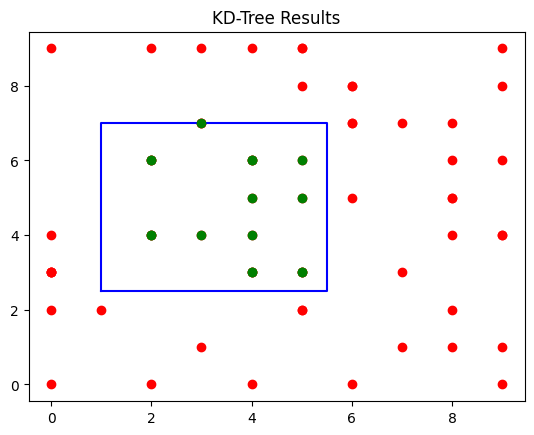

In [ ]:
# Generate 60 random points in the plane
P = [(x, y) for x, y in np.random.randint(0, 10, (60, 2))]

# Build the kd_tree
kd = kd_tree(P)

# Print the kd_tree
print("KD-Tree:\n")
print_kd_tree(kd)

# Define the rectangle
rectangle = (1, 2.5, 5.5, 7)

# rectangle = (1,2,3,4)
print(f"\nRectangle = {rectangle}\n")

# Find the points within the rectangle
points_within_area = points_inside(kd, rectangle)
print(f"\nPoints inside the rectangle:\n {np.array(points_within_area)}\n")

# Make the final plot
plot_kd_tree_with_rectangle(np.array(P), kd, np.array(points_within_area), rectangle)

**Application 3:** *Voronoi Diagram - Delaunay Triangulation.*

Let P be a set of n points in the plane.

In [ ]:
# Generate 20 random points in the plane
P = [tuple(coordinate) for coordinate in np.random.random((20, 2))]

1. Illustrate the correspondence between Delaunay triangulation
and in the Voronoi diagram for P.

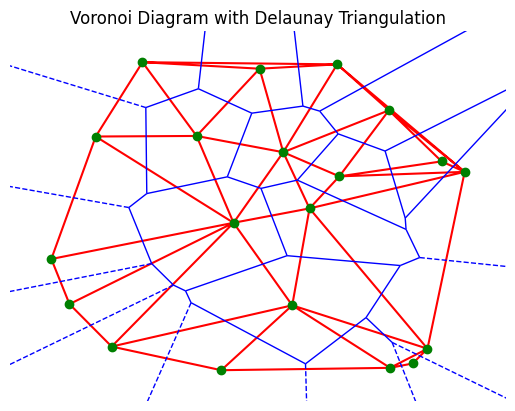

In [ ]:
# Compute the Voronoi diagram
vor = Voronoi(P)
# Compute the Delaunay triangulation
tri = Delaunay(P)
# Plot the Voronoi diagram
voronoi_plot_2d(vor, show_vertices=False, line_colors='blue')
# Convert P set to numpy array
P = np.array(P)
# Connect the points using Delaunay triangulation
plt.triplot(P[:, 0], P[:, 1], tri.simplices, color='red')
# Plot the diagram with green color for the points and without axis
plt.plot(P[:, 0], P[:, 1], 'go')
plt.axis('off')
plt.title('Voronoi Diagram with Delaunay Triangulation')
plt.show()

2. Comment on the complexity of the algorithms. How does the number n of points affect the complexity?<br><br>
<u> **Answer:**</u></br>
The Voronoi algorithm is used to construct Voronoi diagrams, which divide a space into regions based on proximity to a given set of points. The complexity of the Voronoi algorithm is typically $O(n log n)$ for 2D. The complexity arises from the need to sort the points and construct the diagram by crossing the edges. As the number of points increases, the running time of the algorithm increases more slowly in 2D.<br><br>
The Delaunay algorithm, on the other hand, constructs the Delaunay triangulation, which is a geometric structure formed by connecting points such that no point lies inside the circle of any triangle. The complexity of the Delaunay algorithm depends on the dimension of the problem. In 2D, the complexity is typically $O(n log n)$.<br><br>
As the number of points "n" increases, both algorithms show an increase in execution time. However, the growth rate differs between the two algorithms. The Voronoi algorithm has a slower $O(n log n)$ growth rate in 2D, while the Delaunay algorithm has a similar growth rate.